<center><b><h1><font color ='#8B318E '> Autism Prediction </b> </font></h1>

<h3><b><font color ='#8B318E '> Importing Libiraries </b> </font></h3>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier  
import warnings
warnings.filterwarnings('ignore')

<h3><b><font color ='#8B318E '>Read Data </b> </font></h3>

In [3]:
Data = pd.read_csv("autism_screening.csv")
Data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [4]:
print ("The shape of the Data is:", Data.shape)

The shape of the Data is: (704, 21)


<h3><b><font color ='#8B318E '>Data Preprocessing </b> </font></h3>

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [6]:
Data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [7]:
Data["Class/ASD"].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

<h4><b><font color ='#8B318E '>Check null values and deal with them</b> </font></h4>

In [8]:
Data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [9]:
Data.fillna(Data["age"].mean(),inplace=True)

<h4><b><font color ='#8B318E '>Convert several features to binary values</b> </font></h4>


In [10]:
features = ['gender','jundice','austim','used_app_before','Class/ASD']
for feature in features:
    Data[feature]= LabelEncoder().fit_transform(Data[feature])

In [11]:
Data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,1,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,1,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,0,White-European,0,1,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,0,?,0,0,Egypt,0,2.0,18 and more,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,0,White-European,0,0,Russia,0,7.0,18 and more,Self,1
700,1,0,0,0,0,0,0,1,0,1,...,1,Hispanic,0,0,Mexico,0,3.0,18 and more,Parent,0
701,1,0,1,1,1,0,1,1,0,1,...,0,?,0,0,Russia,0,7.0,18 and more,?,1
702,1,0,0,1,1,0,1,0,1,1,...,1,South Asian,0,0,Pakistan,0,6.0,18 and more,Self,0


In [12]:
Data.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                47
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
age_desc            1
relation            6
Class/ASD           2
dtype: int64

<h4><b><font color ='#8B318E '>So in the colunm of 'age_desc' there is one category for whole data ,then we will drop it ,and some other colunms that have no importance</b> </font></h4>

In [13]:
Data=Data.drop(columns=["age_desc","ethnicity","contry_of_res","relation","result"])

In [14]:
Data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,0,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,0,0,0,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,0,0,0,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,0,0,0,1
702,1,0,0,1,1,0,1,0,1,1,35.0,1,0,0,0,0


<h4><b><font color ='#8B318E '>Show the correlation between "ASD" and other features</b> </font></h4>

In [15]:
Data[Data.columns[1:]].corr()['Class/ASD'][:-1]

A2_Score           0.311382
A3_Score           0.441074
A4_Score           0.469945
A5_Score           0.537004
A6_Score           0.592091
A7_Score           0.351429
A8_Score           0.237161
A9_Score           0.635576
A10_Score          0.385917
age                0.059169
gender            -0.080378
jundice            0.102152
austim             0.177415
used_app_before    0.044038
Name: Class/ASD, dtype: float64

<h3><b><font color ='#8B318E '>EDA </b> </font></h3>

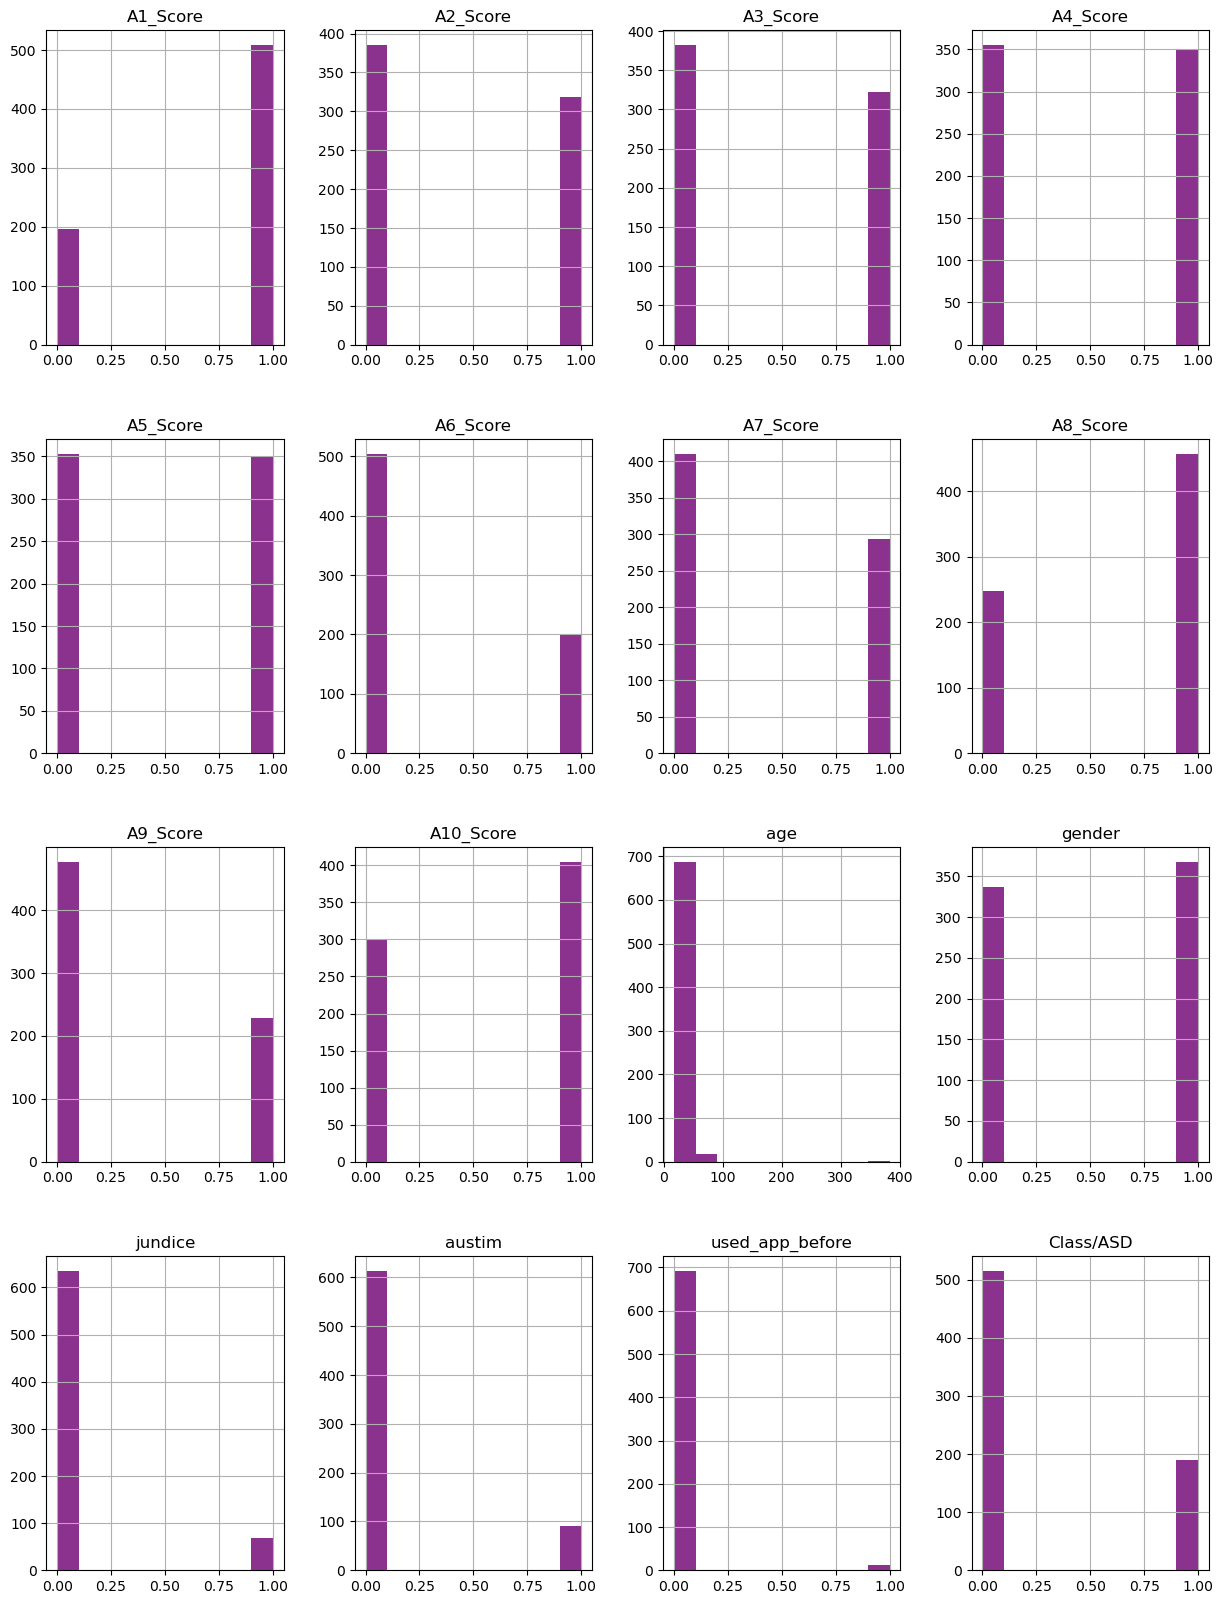

In [16]:
# plot histogram to see the distribution of the data
fig, ax = plt.subplots(figsize =(15, 20))
Data.hist(ax=ax,color="#8B318E")
plt.show()

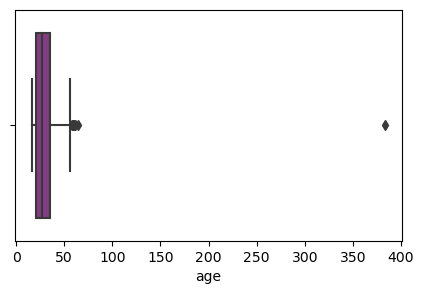

In [17]:
# show distribution of age
plt.figure(figsize=(5,3))  
sns.boxplot( Data['age'],color="#8B318E" )
plt.show()

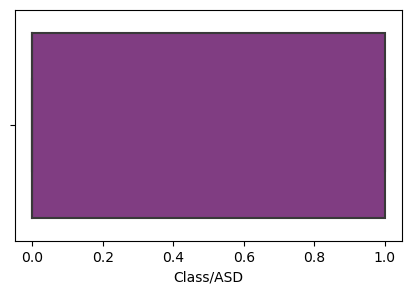

In [18]:
# show distribution of result
plt.figure(figsize=(5,3))  
sns.boxplot( Data['Class/ASD'],color="#8B318E" )
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

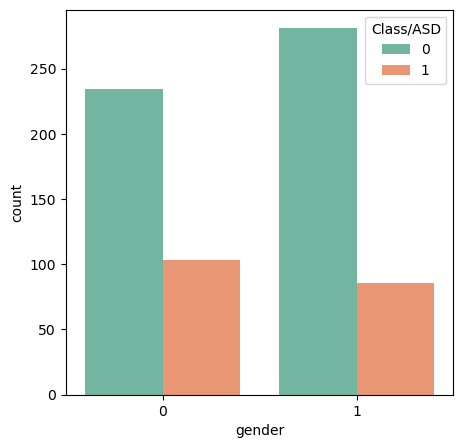

In [19]:
plt.figure(figsize=(5,5))
sns.countplot('gender',hue='Class/ASD',data=Data,palette = "Set2")

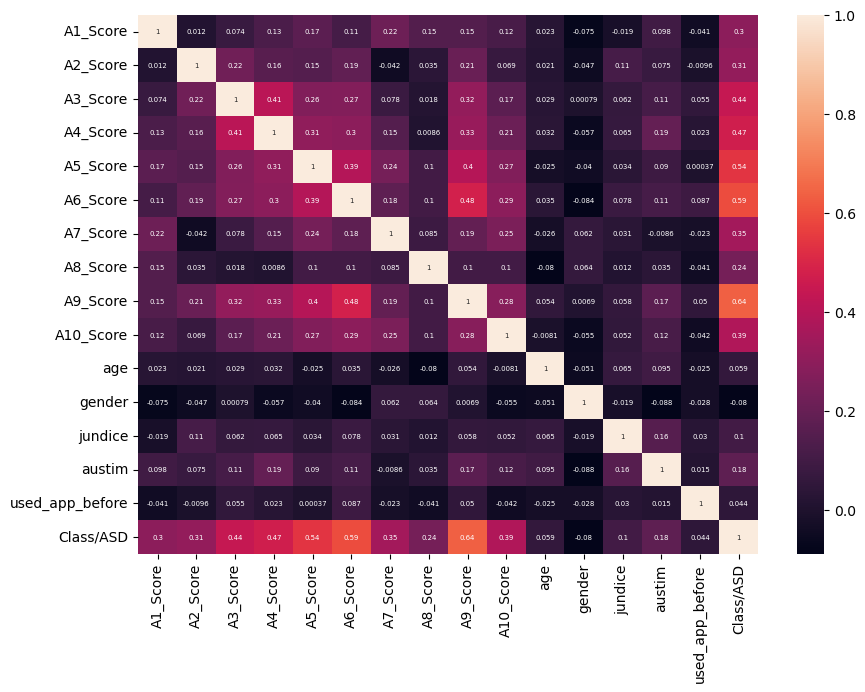

In [20]:
# show heatmap
plt.figure(1 , figsize = (10, 7))
cor = sns.heatmap(Data.corr(), annot = True, annot_kws={"size": 5})

<h3><b><font color ='#8B318E '>Spliting Data  </b> </font></h3>

In [21]:
features = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","age","austim",]
X=Data[features]# X is independent features
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,age,austim
0,1,1,1,1,0,0,1,1,0,26.0,0
1,1,1,0,1,0,0,0,1,0,24.0,1
2,1,1,0,1,1,0,1,1,1,27.0,1
3,1,1,0,1,0,0,1,1,0,35.0,1
4,1,0,0,0,0,0,0,1,0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,25.0,0
700,1,0,0,0,0,0,0,1,0,34.0,0
701,1,0,1,1,1,0,1,1,0,24.0,0
702,1,0,0,1,1,0,1,0,1,35.0,0


In [22]:
y=Data.iloc[: ,-1] # y is dependent feature(the output)
y

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int32

In [23]:
# split data to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<h1><b><font color ='#8B318E '>Models  </b> </font></h1>

<h3><b><font color ='#8B318E '>1-Logistic Regression </b> </font></h3>

In [24]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train) 

LogisticRegression()

In [25]:
y_pred_logistic =logistic.predict(X_test)
y_pred_logistic

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
log_accuracy = round (metrics.accuracy_score(y_test,y_pred_logistic)*100,2)
print(log_accuracy ,"%")


98.11 %


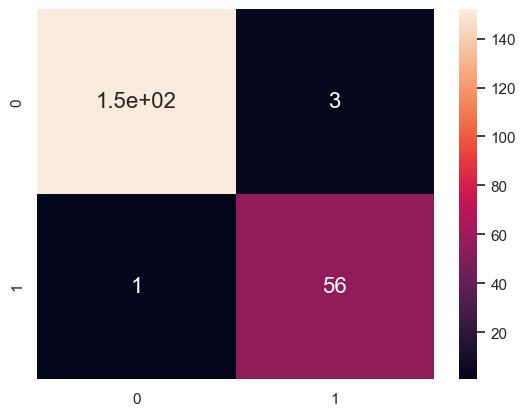

In [27]:
#confusion matrix
conf_matrix_logistic = metrics.confusion_matrix(y_test,y_pred_logistic)    
sns.set(font_scale=1) 
sns.heatmap(conf_matrix_logistic, annot=True, annot_kws={"size": 16})
plt.show()

<h3><b><font color ='#8B318E '>2-SVM </b> </font></h3>

In [28]:
SVM = SVC(kernel='linear', random_state = 0) 
SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
y_pred_SVM = SVM.predict(X_test)
y_pred_SVM

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
svm_accuracy = round (metrics.accuracy_score(y_test,y_pred_SVM)*100,2)
print(svm_accuracy ,"%")

97.64 %


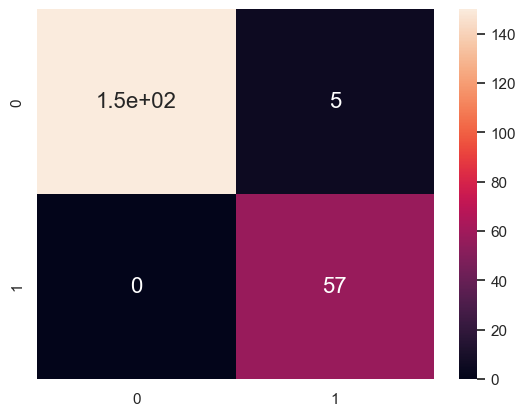

In [31]:
conf_matrix_SVM= metrics.confusion_matrix(y_test,y_pred_SVM)     
sns.set(font_scale=1) # for label size
sns.heatmap(conf_matrix_SVM, annot=True, annot_kws={"size": 16}) 
plt.show()

<h3><b><font color ='#8B318E '>3-Decision Tree </b> </font></h3>

In [32]:
DSC = DecisionTreeClassifier(max_depth = 3, criterion= "entropy" , random_state = 0  )
DSC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
DSC_Y_pred = DSC.predict(X_test)
DSC_Y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
tree_accuracy = round (metrics.accuracy_score(y_test,DSC_Y_pred)*100,2)
print(tree_accuracy ,"%")

88.68 %


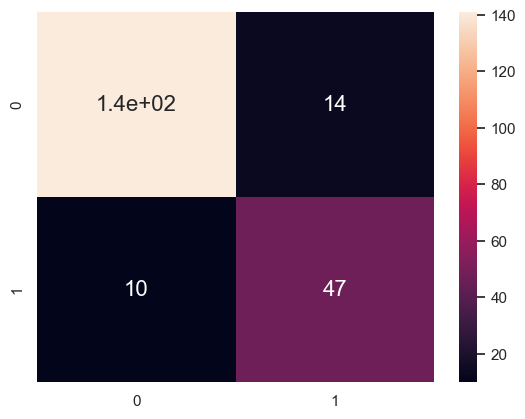

In [35]:
conf_matrix_DSC= metrics.confusion_matrix(y_test,DSC_Y_pred)   
sns.set(font_scale=1) 
sns.heatmap(conf_matrix_DSC, annot=True, annot_kws={"size": 16}) 
plt.show()

<h3><b><font color ='#8B318E '>3-Random forest </b> </font></h3>

In [36]:
RF=RandomForestClassifier(max_depth = 7,random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=0)

In [37]:
RF_pred = RF.predict(X_test)
RF_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
random_accuracy = round (metrics.accuracy_score(y_test,RF_pred)*100,2)
print(random_accuracy ,"%")

96.23 %


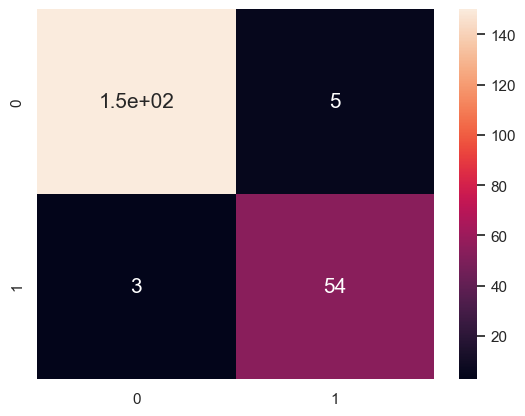

In [39]:
conf_matrix_RF= metrics.confusion_matrix(y_test,RF_pred)   
sns.set(font_scale=1) 
sns.heatmap(conf_matrix_RF, annot=True, annot_kws={"size": 15}) 
plt.show()

<h3><b><font color ='#8B318E '>4-Naive Bayes </b> </font></h3>

In [40]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [41]:
nb_pred = nb.predict(X_test)
nb_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
naive_accuracy = round (metrics.accuracy_score(y_test,nb_pred)*100,2) 
print(naive_accuracy ,"%")

95.75 %


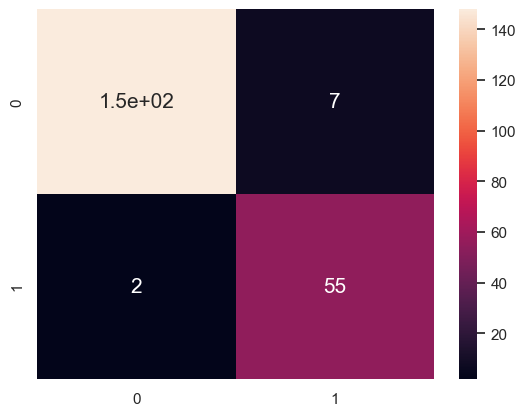

In [43]:
conf_matrix_RF= metrics.confusion_matrix(y_test,nb_pred)   
sns.set(font_scale=1) 
sns.heatmap(conf_matrix_RF, annot=True, annot_kws={"size": 15}) 
plt.show()

<h3><b><font color ='#8B318E '>5-KNN </b> </font></h3>

In [44]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
knn_accuracy = round (metrics.accuracy_score(y_test,knn_pred)*100,2)
print(knn_accuracy ,"%")

92.45 %


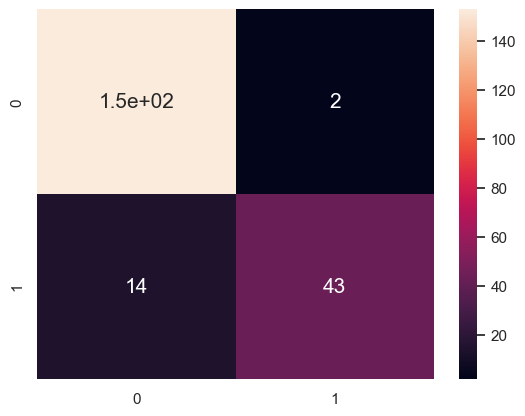

In [47]:
conf_matrix_knn= metrics.confusion_matrix(y_test,knn_pred)   
sns.set(font_scale=1) 
sns.heatmap(conf_matrix_knn, annot=True, annot_kws={"size": 15}) 
plt.show()

<h2><b><font color ='#8B318E '>Comparsion </b> </font></h2>

In [48]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy},
    "Support vector machine":{'Accuracy':svm_accuracy},
    "Random Forest":{'Accuracy':random_accuracy },
    "Naïve Bayes":{'Accuracy':naive_accuracy},
    "K-nearest neighbours":{'Accuracy':knn_accuracy} ,
    "Decision trees":{'Accuracy':tree_accuracy}    
}).T
comparison

,Accuracy
Logistic regression,98.11
Support vector machine,97.64
Random Forest,96.23
Naïve Bayes,95.75
K-nearest neighbours,92.45
Decision trees,88.68


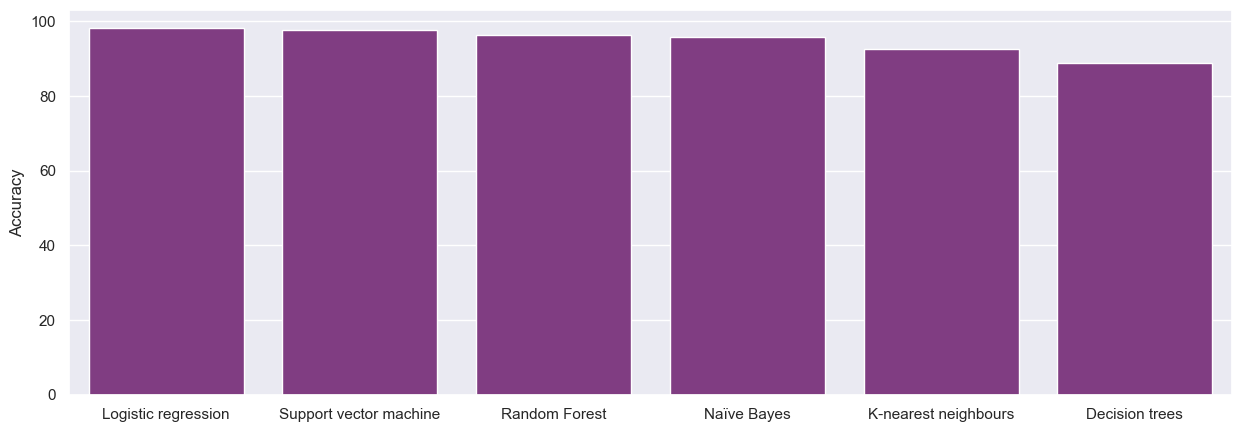

In [49]:
plt.figure(figsize=(15,5))  
sns.barplot(x = comparison.index, y = comparison['Accuracy'], data = comparison,color='#8B318E');
plt.show()